# Document Summarization

The idea of document summarization is a
bit different from keyphrase extraction or topic modeling. In this case, the end result
is still in the form of some document, but with a few sentences based on the length we
might want the summary to be. This is similar to an abstract or an executive summary
in a research paper. The main objective of automated document summarization is
to perform this summarization without involving human input, except for running
computer programs. Mathematical and statistical models help in building and
automating the task of summarizing documents by observing their content and context.

There are two broad approaches to document summarization using automated
techniques. They are described as follows:
- __Extraction-based techniques:__ These methods use mathematical
and statistical concepts like SVD to extract some key subset of the
content from the original document such that this subset of content
contains the core information and acts as the focal point of the entire
document. This content can be words, phrases, or even sentences.
The end result from this approach is a short executive summary of a
couple of lines extracted from the original document. No new content
is generated in this technique, hence the name extraction-based.
- __Abstraction-based techniques:__ These methods are more complex
and sophisticated. They leverage language semantics to create
representations and use natural language generation (NLG)
techniques where the machine uses knowledge bases and semantic
representations to generate text on its own and create summaries
just like a human would write them. Thanks to deep learning, we can
implement these techniques easily but they require a lot of data and
compute.

We will cover extraction based methods here due to constraints of needed a lot of data + compute for abstraction based methods. But you can leverage the seq2seq models you learnt in language translation on an appropriate dataset to build deep learning based abstractive summarizers

# Install necessary dependencies

In [81]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Get Text Document

We use the description of a very popular role-playing game (RPG) Skyrim from
Bethesda Softworks for summarization. 

In [84]:
DOCUMENT = """
Data is foundational to business intelligence, and training data size is one of the main determinants of your model’s predictive power. 
It is like a lever you always have when you are driving a car. So more data leads to more predictive power. 
For sophisticated models such as gradient boosted trees and random forests, quality data and feature engineering reduce the errors drastically.
But simply having more data is not useful. The saying that businesses need a lot of data is a myth. 
If you have 1 trillion data points, outliers are easier to classify and the underlying distribution of that data is clearer. 
If you have 10 data points, this is probably not the case. You’ll have to perform more sophisticated normalization and transformation routines on the data before it is useful.

The big data paradigm is the assumption that big data is a substitute for conventional data collection and analysis. 
In other words, it’s the belief (and overconfidence) that huge amounts of data is the answer to everything and that we can just train machines to solve problems automatically. 
Data by itself is not a panacea and we cannot ignore traditional analysis.

Researchers have demonstrated that massive data can lead to lower estimation variance and hence better predictive performance. 
More data increases the probability that it contains useful information, which is advantageous. 

However, not all data is always helpful. 
A good example is clickstream data utilised by e-com companies where a user’s actions are monitored and analysed. 
Such data includes parts of the page that are clicked, keywords, cookie data, cursor positions and web page components that are visible. 
This is a lot of data coming in rapidly, but only a portion is valuable in predicting a user’s characteristics and preferences. 
The rest is noise. When data are taken from human actions, noise rates usually are high due to the limitations enforced by behavioural tendencies. 
What you ideally need is a set of data points that outline the range of variations with each class that one would like to train the ML system with. 

Having more data certainly increases the accuracy of your model, but there comes a stage where even adding infinite amounts of data cannot improve any more accuracy. 
This is what we called the natural noise of the data. When you work with different ML models, we see that certain features of the data are spread on a given variance, which is a probabilistic distribution. 
Dipanjan Sarkar, Data Science Lead at Applied Materials explains, “The standard principle in data science is that more training data leads to better machine learning models. 
However what we need to remember is the ‘Garbage In Garbage Out’ principle! It is not just big data, but good (quality) data which helps us build better performing ML models. 
If we have a huge data repository with features which are too noisy or not having enough variation to capture critical patterns in the data, any ML models will effectively be useless regardless of the data volume.”

According to research, if the model is tuned with too much to the data, then it could essentially memorise the data, and that causes model overfitting, which causes high error rates for unseen data. 
If we are overfitting, we get wrong predictions and lose the focus on what’s actually important. 
An overfitting model implies that you have low bias and high variance and more data is not going to solve your problem. 
By placing too much emphasis on each data point, data scientists have to deal with a lot of noise and, therefore, lose sight of what’s really important. 
So adding more data points to the training set will not improve the model performance. 

We need big data mostly when you have a ton of features, like image processing, where there is a need for ample data sources to train a model or language models for that matter. 
According to experts, you have to find the right parameters for fancy models that generally lead to big datasets to get high accuracy. 
There are many knobs, and you have to try enough knobs in the right parts of the space that contributes to reduced training error. 

“There are no shortcuts or direct mathematical formulae to say if we have enough data. 
The only way would be to actually get out there and build relevant ML models on the data and validate based on performance metrics (which are in-line with the business metrics & KPIs) to see if we are getting a satisfactory performance,” Dipanjan further says.

More data in principle is good. 
But actually, it matters to have the right kind of data. 
Sampling training data from your actual target domain always matters. 
Even within a domain, it matters how you sample. 
So modelling choices and data sampling approach jointly matter more than just data. 
Samples must represent real-world example data that have a good chance of being encountered in the future.

The main reason why data is desirable is that it lends more information about the dataset and thus becomes valuable. 
However, if the newly created data resemble the existing data, or simply repeated data, then there is no added value of having more data. 
For example, in an online review dataset, there is not much of a lift from the large dataset because you probably do not have a lot of variables and thousands of user reviews get you the same sample.

From a pure regression standpoint and if you have a true sample, data size beyond a point does not matter. 
There is diminishing value in adding observations from a Mean Square Error standpoint, a standard way to measure the error of a model in predicting quantitative data. 

It is explicit from previous work that more data do not surely lead to greater predictive performance. 
It has been argued that sampling (decreasing the number of instances) or transformation of the data to lower the dimensional spaces (lessening the number of features) is beneficial. 
In fact, not all areas of machine learning are associated with big data. In fact, one of the most exciting and recent areas is related to making sense out of small data.

When we think of advanced models, we assume that advanced machine learning models, everything has to be learned from the data. 
There are several use cases where few data points have worked equally well using techniques like simulation, etc., semi-supervised learning, etc.  

Practically, there is research on neural network architectures that do reasonably well with just a thousand data points. 
They are not fancy but better than some machine learning methods if you have the right problem type. 
“With the advent of innovative methodologies like transfer learning, unsupervised, self-supervised and semi-supervised learning, we are seeing new areas of research being actually adapted in the industry to build better quality ML models with less (labeled) data,” tells Dipanjan Sarkar.
There is also extensive work going on in terms of techniques that reduce the requirements for data. 
They are working on building ways to pull in human experience and knowledge rather than trying to discover everything from the raw data itself.  
Organisations are focusing on building hybrid machine learning systems that combine old fashioned rule-based systems with the underlying neural architectures, and have a bi-directional flow of information that learn from logical statements. 

For smaller firms, fewer datasets would be equally desirable or preferable to more data, and there are situations where more data present expenses that are not justified by the added value of the additional data. 
Data storage is an expense, and analysts who can work with datasets that are too large to fit in memory, with the appropriate tools, are more expensive than those who cannot. 

A collection of a small dataset is good enough for answering the question of interest, and there is no incentive to collect additional data considering the practical time and financial burdens it may create. 
Hacking and privacy breaches are other possibilities with storing too much data which demands the efforts of a malicious entity to produce adverse consequences. 
There are also examples where a company may breach a privacy regulation in its quest to acquire a large dataset.
"""

In [85]:
import re

DOCUMENT = re.sub(r'\n|\r', ' ', DOCUMENT)
DOCUMENT = re.sub(r' +', ' ', DOCUMENT)
DOCUMENT = DOCUMENT.strip()

# Summarization with Gensim

Let’s look at an implementation of document summarization by leveraging Gensim’s
summarization module. It is pretty straightforward.

In [86]:
from gensim.summarization import summarize

print(summarize(DOCUMENT, ratio=0.2, split=False))

For sophisticated models such as gradient boosted trees and random forests, quality data and feature engineering reduce the errors drastically.
Researchers have demonstrated that massive data can lead to lower estimation variance and hence better predictive performance.
What you ideally need is a set of data points that outline the range of variations with each class that one would like to train the ML system with.
Dipanjan Sarkar, Data Science Lead at Applied Materials explains, “The standard principle in data science is that more training data leads to better machine learning models.
It is not just big data, but good (quality) data which helps us build better performing ML models.
An overfitting model implies that you have low bias and high variance and more data is not going to solve your problem.
So adding more data points to the training set will not improve the model performance.
The only way would be to actually get out there and build relevant ML models on the data and validate

In [87]:
print(summarize(DOCUMENT, word_count=75, split=False))

Researchers have demonstrated that massive data can lead to lower estimation variance and hence better predictive performance.
So adding more data points to the training set will not improve the model performance.
Sampling training data from your actual target domain always matters.
There are several use cases where few data points have worked equally well using techniques like simulation, etc., semi-supervised learning, etc.


In [88]:
sentences = nltk.sent_tokenize(DOCUMENT)
len(sentences)

65

This summarization implementation from Gensim is based on a variation of
a popular algorithm called TextRank. 

# Basic Text pre-processing

In [89]:
import numpy as np

stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_sentences = normalize_corpus(sentences)
norm_sentences[:3]

array(['data foundational business intelligence training data size one main determinants models predictive power',
       'like lever always driving car', 'data leads predictive power'],
      dtype='<U270')

# Text Representation with Feature Engineering

We will be vectorizing our normalized sentences using the TF-IDF feature engineering
scheme. We keep things simple and don’t filter out any words based on document
frequency. But feel free to try that out and maybe even leverage n-grams as features.

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tv = TfidfVectorizer(min_df=0., max_df=1., ngram_range=(1,3), use_idf=True)
dt_matrix = tv.fit_transform(norm_sentences)
dt_matrix = dt_matrix.toarray()

vocab = tv.get_feature_names()
td_matrix = dt_matrix.T
print(td_matrix.shape)
pd.DataFrame(np.round(td_matrix, 2), index=vocab).head(10)

(1683, 65)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64
according,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.09,0.0,0.0,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
according experts,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
according experts find,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
according research,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
according research model,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
accuracy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
accuracy model,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
accuracy model comes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00
acquire,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19
acquire large,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.19


# Extractive Summarization with TextRank

The TextRank summarization algorithm internally uses the popular PageRank
algorithm, which is used by Google for ranking websites and pages. This is used by the
Google search engine when providing relevant web pages based on search queries. To
understand TextRank better, we need to understand some of the concepts surrounding
PageRank. The core algorithm in PageRank is a graph-based scoring or ranking
algorithm, where pages are scored or ranked based on their importance. 

Websites and
pages contain further links embedded in them which link to more pages having more
links and this continues across the Internet. This can be represented as a graph-based
model where vertices indicate the web pages and edges indicate links among them. This
can be used to form a voting or recommendation system such so when one vertex links
to another one in the graph it is basically casting a vote. 

Vertex importance is decided
not only on the number of votes or edges but also the importance of the vertices that are
connected to it and their importance. 

![](https://i.imgur.com/fMyJjUN.png)

We can see that vertex denoting Page C has a higher score than
Page E even if it has fewer edges compared to Page E, because Page B is an important
page connected to Page C.

For textrank we will follow a similar process leveraging pagerank

![](https://i.imgur.com/kkrzeq7.png)

- Tokenize and extract sentences from the document to be
summarized.
- Decide on the number of sentences, k, that we want in the final
summary
- Build a document-term feature matrix using weights like TF-IDF
or Bag of Words.
- Compute a document similarity matrix by multiplying the matrix
by its transpose.
- Use these documents (sentences in our case) as the vertices and
the similarities between each pair of documents as the weight
or score coefficient we talked about earlier and feed them to the
PageRank algorithm.
- Get the score for each sentence.
- Rank the sentences based on score and return the top k sentences.

# Build Similarity Matrix

In [91]:
similarity_matrix = np.matmul(dt_matrix, dt_matrix.T)
print(similarity_matrix.shape)
np.round(similarity_matrix, 3)

(65, 65)


array([[1.   , 0.   , 0.164, ..., 0.003, 0.004, 0.   ],
       [0.   , 1.   , 0.   , ..., 0.   , 0.   , 0.   ],
       [0.164, 0.   , 1.   , ..., 0.004, 0.004, 0.   ],
       ...,
       [0.003, 0.   , 0.004, ..., 1.   , 0.002, 0.038],
       [0.004, 0.   , 0.004, ..., 0.002, 1.   , 0.025],
       [0.   , 0.   , 0.   , ..., 0.038, 0.025, 1.   ]])

# Build Similarity Graph

In [92]:
import networkx

similarity_graph = networkx.from_numpy_array(similarity_matrix)
similarity_graph

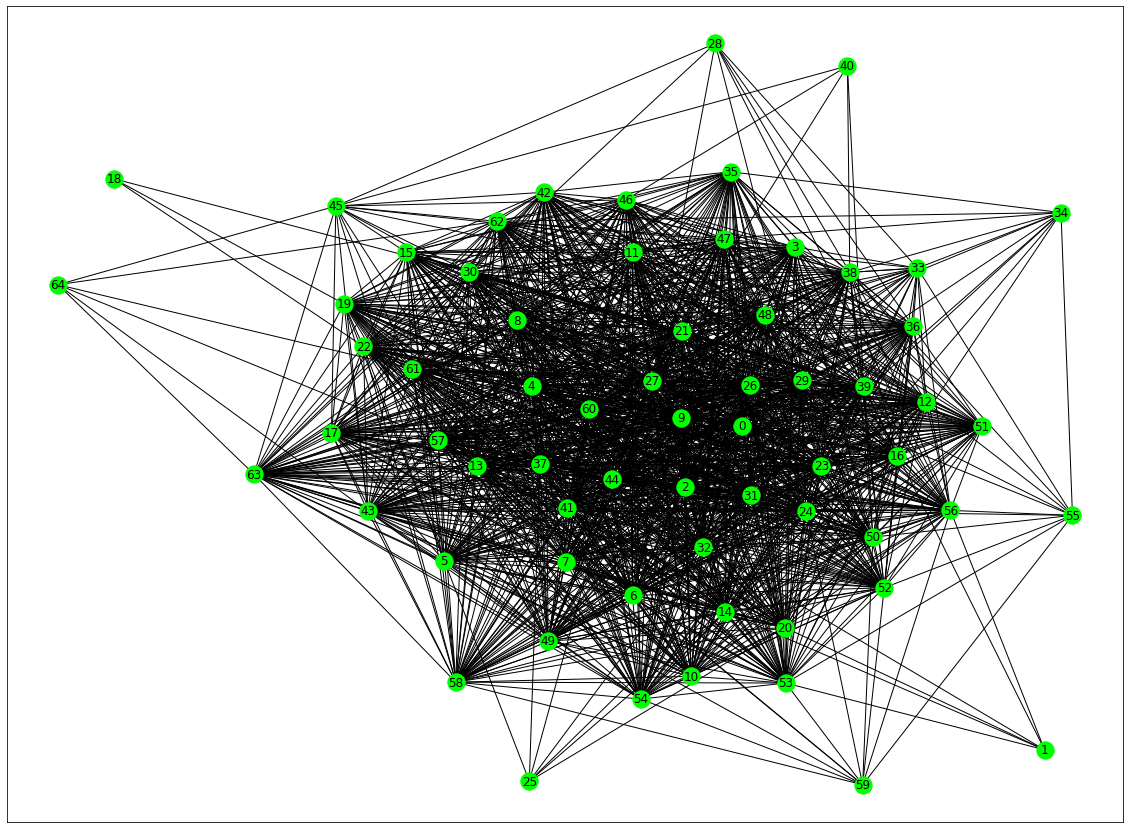

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 15))
networkx.draw_networkx(similarity_graph, node_color='lime')

# Get Sentence Importance Scores

In [94]:
scores = networkx.pagerank(similarity_graph)
ranked_sentences = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
ranked_sentences[:10]

[(0.02014958993590463, 24),
 (0.019305685511501948, 26),
 (0.019081875693809237, 27),
 (0.0178336957004396, 0),
 (0.01776304428793381, 50),
 (0.01774726338828229, 31),
 (0.017742709428126443, 44),
 (0.017703306296274812, 32),
 (0.017668861850376957, 9),
 (0.016986548277550664, 37)]

In [95]:
num_sentences = 5
top_sentence_indices = [ranked_sentences[index][1] 
                        for index in range(num_sentences)]
top_sentence_indices.sort()

In [97]:
print('\n'.join(np.array(sentences)[top_sentence_indices]))

Data is foundational to business intelligence, and training data size is one of the main determinants of your model’s predictive power.
Dipanjan Sarkar, Data Science Lead at Applied Materials explains, “The standard principle in data science is that more training data leads to better machine learning models.
It is not just big data, but good (quality) data which helps us build better performing ML models.
If we have a huge data repository with features which are too noisy or not having enough variation to capture critical patterns in the data, any ML models will effectively be useless regardless of the data volume.” According to research, if the model is tuned with too much to the data, then it could essentially memorise the data, and that causes model overfitting, which causes high error rates for unseen data.
In fact, not all areas of machine learning are associated with big data.
